In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto( device_count = {'GPU': 0, 'CPU': 56})
sess = tf.Session(config=config)
keras.backend.set_session(sess)

In [3]:
num_classes = 7   
batch_size = 256
epochs = 5

In [4]:
with open('fer2013.csv') as f:
    content = f.readlines()

lines = np.array(content)

In [5]:
num_instances = lines.size
num_instances

35888

In [6]:
import pandas as pd

In [7]:
dataset = pd.read_csv('fer2013.csv')

In [8]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
x_train, y_train, x_test, y_test = [], [], [],[]

In [ ]:
for i in range(1, num_instances):
    try:
        emotion, img, usage = lines[i].split(',')
        
        val = img.split(" ")
        
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
        
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("", end="")
            

In [ ]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

In [ ]:
x_train /=255
x_test /= 255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 48,48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48,48, 1)
x_test = x_test.astype('float32')

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
model = Sequential()
model.add(Conv2D(64, (5,5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
gen = ImageDataGenerator()

train_generator = gen.flow(x_train, y_train, batch_size= batch_size)

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer= keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [ ]:
model.fit_generator(train_generator, steps_per_epoch= batch_size, epochs= epochs)

In [ ]:
model_json = model.to_json()
with open('facial_expression_model_structure.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights('facial_expression_model_weights.h5')

## making inference / predictions

In [1]:
from keras.models import model_from_json

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
model = model_from_json(open('facial_expression_model_structure.json', 'r').read())
model.load_weights('facial_expression_model_weights.h5')

In [10]:
def emotion_analysis(emotion):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotion, align='center', alpha=0.5)
    plt.xticks(y_pos,objects)
    
    plt.ylabel('percentage')
    plt.title('emotion classifier')
    
    plt.show()

In [26]:
img = image.load_img('jlo.jpg', color_mode='grayscale', target_size=(48,48))

In [27]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x /= 255


In [28]:
custom_pred = model.predict(x)

In [29]:
custom_pred[0]

array([ 0.24429819,  0.02982724,  0.12031299,  0.08911973,  0.1541426 ,
        0.04288267,  0.31941658], dtype=float32)

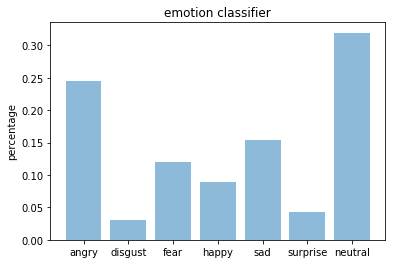

In [30]:
emotion_analysis(custom_pred[0])